# Data Collection

In [ ]:
import pandas as pd

gdp = pd.read_csv("gdp.csv")
gdp = gdp.dropna()
print(gdp.head())



   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4           

# Data Preparation (Cleaning)

In [3]:
print(gdp.isnull().sum())
gdp.dropna(inplace = True)
print(gdp.dtypes)

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64
Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object


In [4]:
cols = ['Cost of Living Index','Rent Index', 'Cost of Living Plus Rent Index','Groceries Index', 
'Restaurant Price Index', 'Local Purchasing Power Index']

gdp[cols] = gdp[cols].apply(pd.to_numeric, errors = 'coerce')

# Exploratory Data Analysis (EDA)

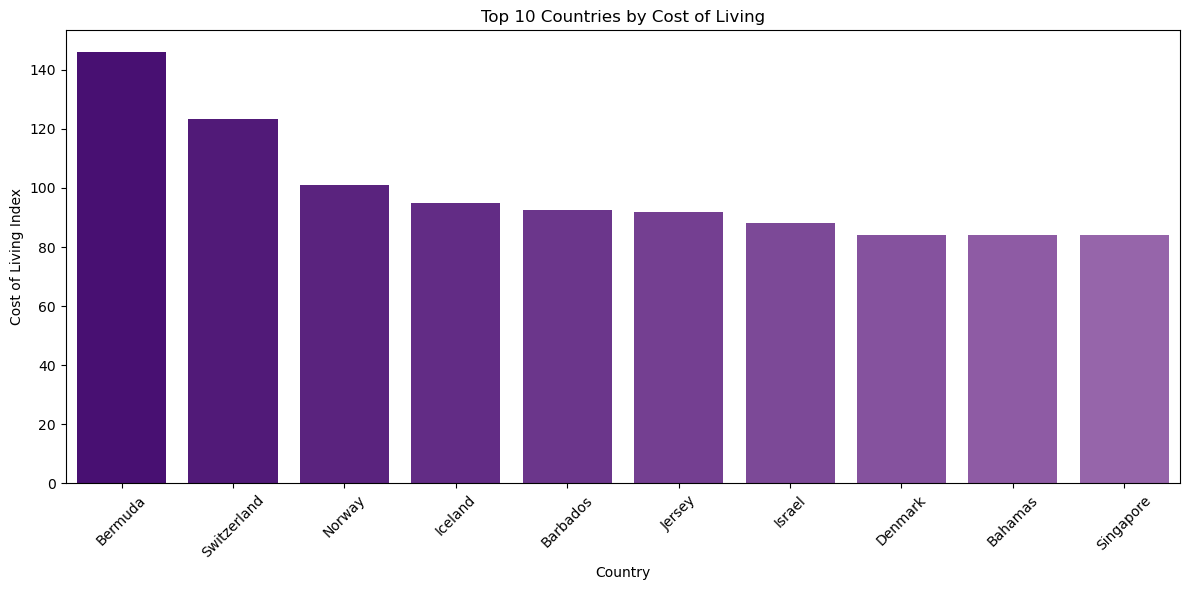

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


top_cost = gdp.sort_values(by='Cost of Living Index', ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.blend_palette(["#4B0082", "#9b59b6"], n_colors=10)
sns.barplot(data=top_cost, x='Country', y='Cost of Living Index', palette=colors, hue='Country', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Cost of Living')
plt.tight_layout()
plt.show()

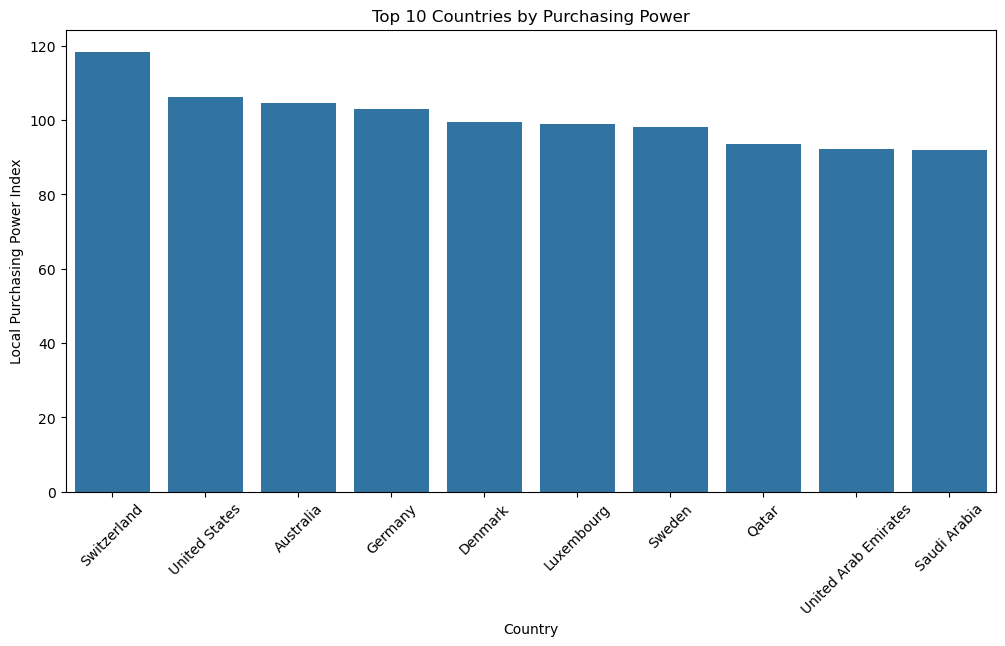

In [26]:
top_power = gdp.sort_values(by='Local Purchasing Power Index', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_power, x='Country', y='Local Purchasing Power Index')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Purchasing Power')
plt.show()

# Statistical Analysis

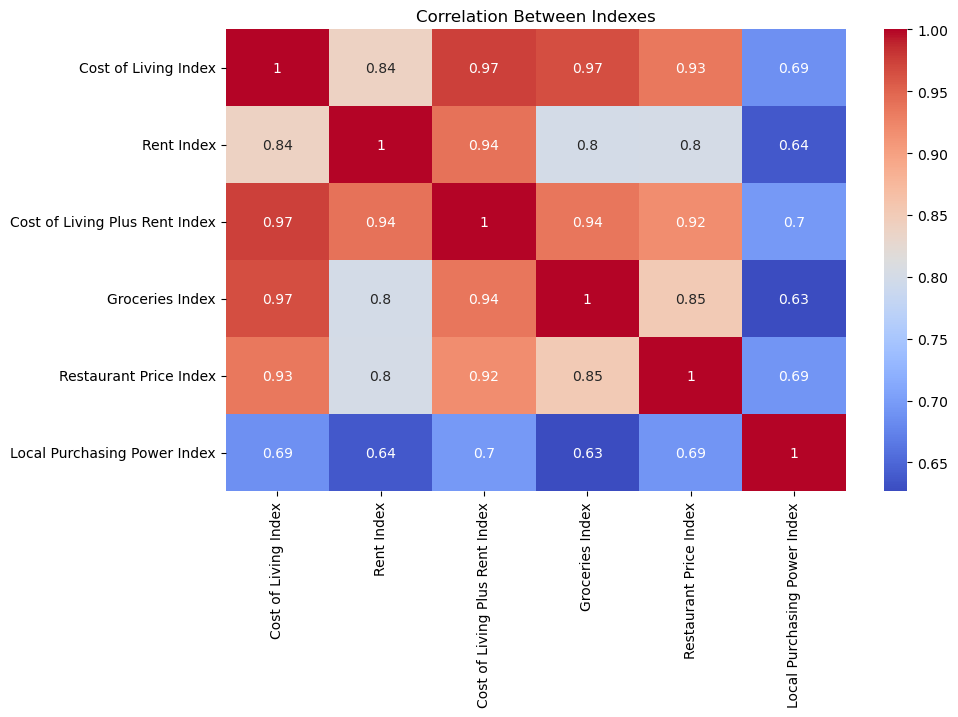

In [27]:
correlation = gdp[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Indexes')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

X = gdp[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
y = gdp['Cost of Living Index']

model = LinearRegression()
model.fit(X,y)

print('Model Coefficients:' , model.coef_)
print('Intercept:' , model.intercept_)

Model Coefficients: [0.06899309 0.58899924 0.31087722 0.02173511]
Intercept: 6.872891901184531


# Interpretation:
 The Groceries Index has the biggest impact on Cost of Living (coefficient = 0.589).
The Purchasing Power Index has the least impact (only 0.0217).
The intercept (6.87) means: if all other values were 0, the base cost of living would start around 6.87.